# Clustering model with Scikit-learn

## Table of content

* [1. K-means on artificial data](#ch1)
    * [1.1. Prepare data](#ch1_1)
    * [1.2. K-mean](#ch1_2)
    * [1.3. Evaluation](#ch1_3)
* [2. K-mean on Iris dataset](#ch2)
    * [2.1. Prepare data](#ch2_1)
    * [2.2. K mean](#ch2_2)
        * [2.2.1. K-mean on two features](#ch2_2_1)
        * [2.2.2 K-mean on all features](#ch2_2_2)
* [3. Clustering models](#ch3)
    * [3.1. Cendroid-based clustering](#ch3_1)
         * [3.1.1 K-means](#ch3_1_1)
         * [3.1.2 Mini-batch K-means](#ch3_1_2)
    * [3.2. Hierarchical clustering](#ch3_2)
        * [3.2.1. Aglomerative clustering](#ch3_2_1)
        * [3.2.2. BIRCH clustering](#ch3_2_2)
    * [3.3. Density-based clustering](#ch3_3)
        * [3.3.1. DBSCAN clustering](#ch3_3_1)
        * [3.3.2. Mean-shift clustering](#ch3_3_2)
    * [3.4. Distribution-based clustering](#ch3_4)
        * [3.4.1. Affinity propagation clustering](#ch3_4_1)
    * [3.5. Spectral clustering using a precomputed matrix](#ch3_5)
* [4. Hyperparameter tuning](#ch4)
    * [4.1. K-means](#ch4_1)
    * [4.2. DBSCAN](#ch4_2)
    * [4.3. Mean-schift ](#ch4_3)
* [5. Clustering models on image data](#ch5)
    * [5.1.Prepare data](#ch5_1)
    * [5.2. K-means on images](#ch5_2)
    * [5.3. Minibach K-means on images](#ch5_3)


## 1. K-means on artificial data  <a class="anchor" id="ch1"></a>

In [1]:
import sklearn 
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # data vizualisation
import random
import warnings
warnings.filterwarnings("ignore")

### 1.1. Prepare data <a class="anchor" id="ch1_1"></a>

In [2]:
# dataset -> 150 points with tow values x and y 
data_1 = np.array([[random.randint(1,400) for i in range(2)]for j in range(50)],dtype=np.float64)
data_2 = np.array([[random.randint(300,700) for i in range(2)]for j in range(50)],dtype=np.float64)
data_3 = np.array([[random.randint(600,900) for i in range(2)]for j in range(50)],dtype=np.float64)
data = np.append(np.append(data_1,data_2,axis=0),data_3,axis=0)

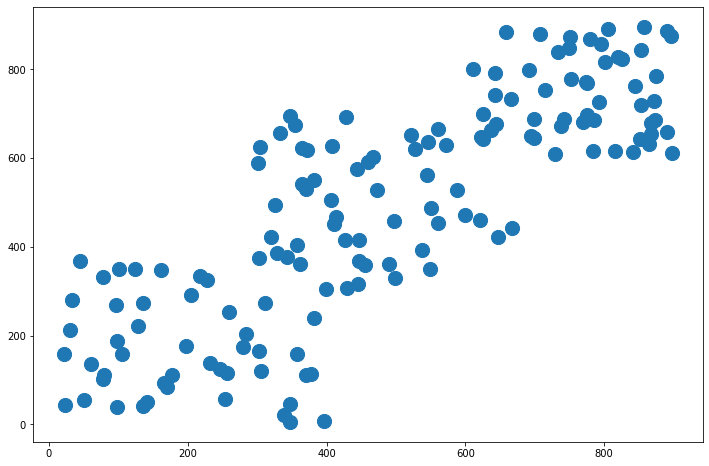

In [3]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(data[:,0],data[:,1],s=200)

In [4]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels_1, labels_2,axis=0),labels_3,axis=0)

In [5]:
df = pd.DataFrame({'data_x':data[:,0],'data_y':data[:,1],'labels':labels})
df.sample(10)

,data_x,data_y,labels
10,177.0,111.0,0
37,105.0,159.0,0
127,844.0,763.0,2
63,406.0,506.0,1
135,873.0,685.0,2
88,408.0,628.0,1
33,228.0,325.0,0
32,51.0,54.0,0
133,774.0,771.0,2
110,699.0,688.0,2


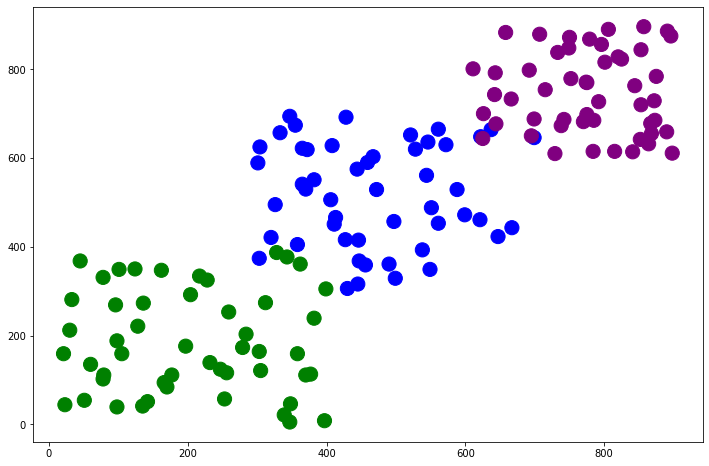

In [6]:
colors=['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'],c=df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors))

### 1.2. K-mean<a class="anchor" id="ch1_2"></a>

In [7]:
kmeans_model = KMeans(n_clusters=3,max_iter=10000).fit(data)
kmeans_model.labels_

array([0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
centroids = kmeans_model.cluster_centers_
centroids

array([[191.95652174, 170.13043478],
       [769.1509434 , 741.96226415],
       [448.45098039, 497.43137255]])

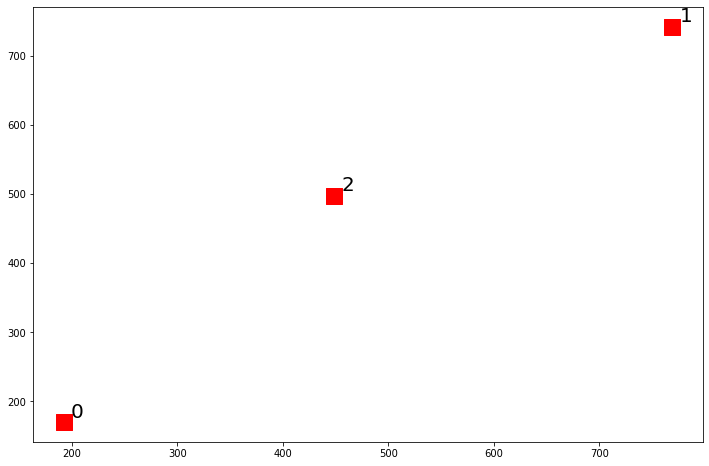

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=250,marker='s')
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0] + 7, centroids[i][1] + 7),fontsize=20)

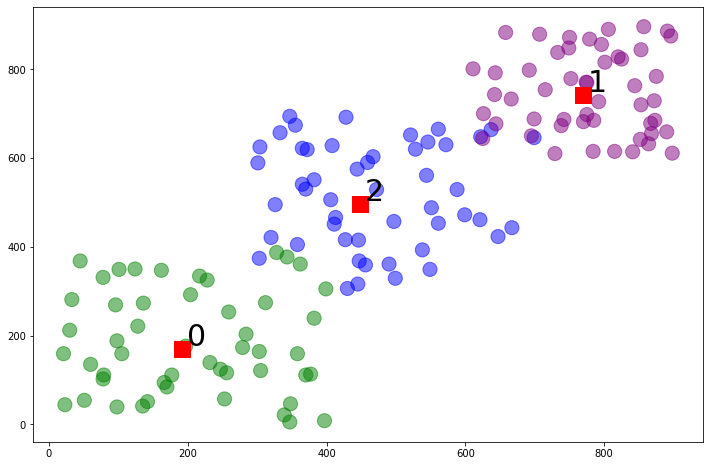

In [10]:
colors=['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'],c=df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=250,marker='s')
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0] + 7, centroids[i][1] + 7),fontsize=30)

In [11]:
data_test = np.array([[442.,621.],[50.,153.],[333.,373.],[835.,816,]])
label_pred = kmeans_model.predict(data_test)
label_pred

array([2, 0, 2, 1], dtype=int32)

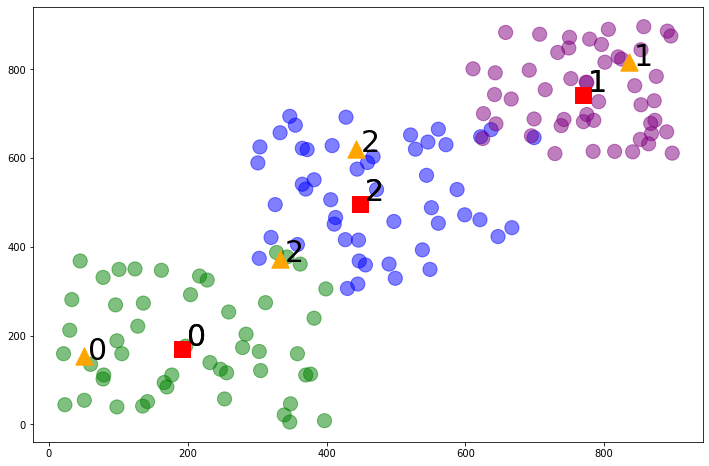

In [12]:
colors=['green','blue','purple']
plt.figure(figsize=(12,8))
plt.scatter(df['data_x'],df['data_y'],c=df['labels'],s=200,cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0] + 7, centroids[i][1] + 7),fontsize=30)
plt.scatter(data_test[:,0],data_test[:,1],c='orange',s=300,marker='^')
for i in range(len(label_pred)):
    plt.annotate(label_pred[i],(data_test[i][0] + 7, data_test[i][1] - 7),fontsize=30)
plt.scatter(centroids[:,0],centroids[:,1],c='r',s=250,marker='s')
for i in range(len(centroids)):
    plt.annotate(i,(centroids[i][0] + 7, centroids[i][1] + 7),fontsize=30)


### 1.3. Evaluation <a class="anchor" id="ch1_3"></a>

In [13]:
print('Homogeneity_score: ',metrics.homogeneity_score(labels,kmeans_model.labels_))
print('Completness_score: ',metrics.completeness_score(labels,kmeans_model.labels_))
print('v_measure_score: ',metrics.v_measure_score(labels,kmeans_model.labels_))
print('Adjusted_rand_score: ',metrics.adjusted_rand_score(labels,kmeans_model.labels_))
print('Adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(labels,kmeans_model.labels_))
print('Silhouette_score: ',metrics.silhouette_score(data,kmeans_model.labels_))

Homogeneity_score:  0.8449590931609804
Completness_score:  0.8463078712238384
v_measure_score:  0.8456329443700841
Adjusted_rand_score:  0.865717047071825
Adjusted_mutual_info_score:  0.8436993545231104
Silhouette_score:  0.5256808996811823


## 2. K-mean on Iris dataset<a class="anchor" id="ch2"></a>

### 2.1. Explore dataset <a class="anchor" id="ch2_1"></a>

In [14]:
iris_df = pd.read_csv('datasets/iris.csv',skiprows=1,names=['sepal-length','sepal-width','petal-length','petal-width','class'])
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,6.3,3.3,4.7,1.6,Iris-versicolor
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,4.6,3.2,1.4,0.2,Iris-setosa


In [16]:
iris_df['class'].unique()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [17]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.9,3.0,4.2,1.5,1
1,6.3,3.3,4.7,1.6,1
2,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,4.6,3.2,1.4,0.2,0


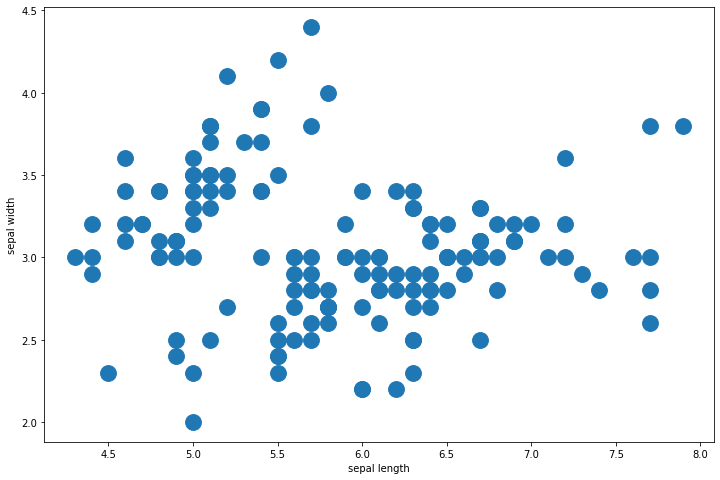

In [18]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(iris_df['sepal-length'],iris_df['sepal-width'],s=250)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()
# On déduit 0 cluster

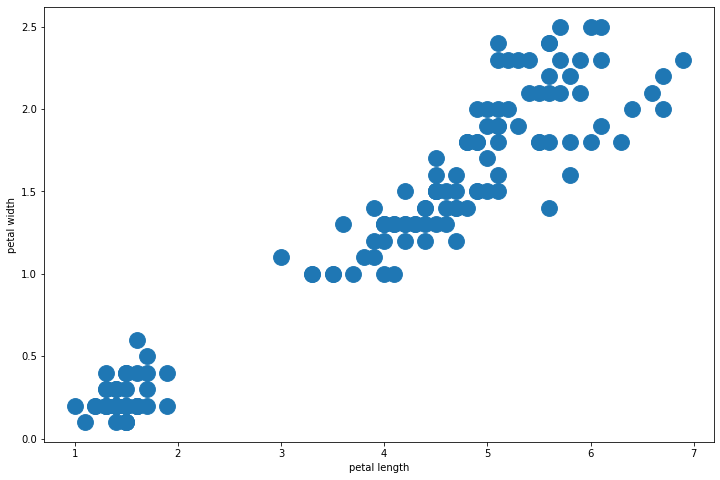

In [19]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(iris_df['petal-length'],iris_df['petal-width'],s=250)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()
# On déduit 2 cluster

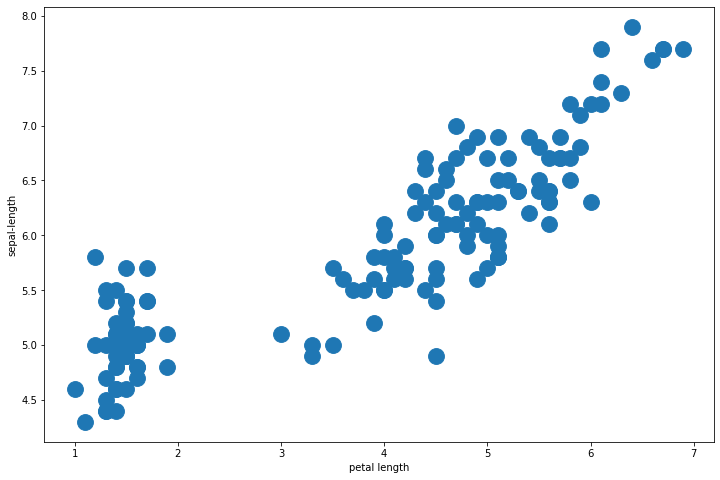

In [20]:
fig,ax = plt.subplots(figsize=(12,8))
plt.scatter(iris_df['petal-length'],iris_df['sepal-length'],s=250)
plt.xlabel('petal length')
plt.ylabel('sepal-length')
plt.show()
# On déduit 3 cluster

### 2.2. K mean <a class="anchor" id="ch2_2"></a>

#### 2.2.1. K-mean on two features <a class="anchor" id="ch2_2_1"></a>

In [21]:
iris_2D = iris_df[['sepal-length','petal-length']]
iris_2D.sample(5)

,sepal-length,petal-length
137,6.1,4.7
124,5.7,4.2
71,6.5,5.1
4,4.6,1.4
27,6.0,4.0


In [22]:
iris_2D = np.array(iris_2D)

In [23]:
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

In [24]:
kmeans_model_2D.labels_

array([0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2,
       1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1], dtype=int32)

In [25]:
centroids_2D = kmeans_model_2D.cluster_centers_
centroids_2D

array([[5.87413793, 4.39310345],
       [5.00784314, 1.49411765],
       [6.83902439, 5.67804878]])

In [26]:
iris_labels = iris_df['class']
print('Homogeneity_score: ',metrics.homogeneity_score(iris_labels,kmeans_model_2D.labels_))
print('Completness_score: ',metrics.completeness_score(iris_labels,kmeans_model_2D.labels_))
print('v_measure_score: ',metrics.v_measure_score(iris_labels,kmeans_model_2D.labels_))
print('Adjusted_rand_score: ',metrics.adjusted_rand_score(iris_labels,kmeans_model_2D.labels_))
print('Adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(iris_labels,kmeans_model_2D.labels_))
print('Silhouette_score: ',metrics.silhouette_score(iris_2D,kmeans_model_2D.labels_))

Homogeneity_score:  0.7033177646052958
Completness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409134
Silhouette_score:  0.5890612473759282


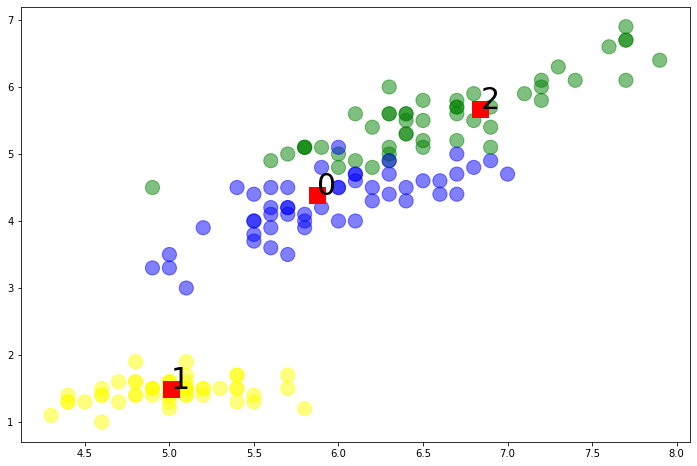

In [27]:
colors=['yellow','blue','green']
plt.figure(figsize=(12,8))
plt.scatter(iris_df['sepal-length'],iris_df['petal-length'],c=iris_df['class'],s=200,cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)
plt.scatter(centroids_2D[:,0],centroids_2D[:,1],c='r',s=250,marker='s')
for i in range(len(centroids_2D)):
    plt.annotate(i,(centroids_2D[i][0], centroids_2D[i][1]),fontsize=30)

#### 2.2.2. K-mean on all features <a class="anchor" id="ch2_2_2"></a>

In [28]:
iris_features = iris_df.drop('class',axis=1)
iris_labels = iris_df['class']
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.9,3.0,4.2,1.5
1,6.3,3.3,4.7,1.6
2,4.9,3.0,1.4,0.2
3,4.6,3.1,1.5,0.2
4,4.6,3.2,1.4,0.2


In [29]:
iris_labels.sample(5)

105    0
66     0
141    1
32     0
128    0
Name: class, dtype: int64

In [30]:
kmeans_model = KMeans(n_clusters=3).fit(iris_features)

In [31]:
print('Homogeneity_score: ',metrics.homogeneity_score(iris_labels,kmeans_model.labels_))
print('Completness_score: ',metrics.completeness_score(iris_labels,kmeans_model.labels_))
print('v_measure_score: ',metrics.v_measure_score(iris_labels,kmeans_model.labels_))
print('Adjusted_rand_score: ',metrics.adjusted_rand_score(iris_labels,kmeans_model.labels_))
print('Adjusted_mutual_info_score: ',metrics.adjusted_mutual_info_score(iris_labels,kmeans_model.labels_))
print('Silhouette_score: ',metrics.silhouette_score(iris_features,kmeans_model.labels_))

Homogeneity_score:  0.7514854021988338
Completness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
Adjusted_rand_score:  0.7302382722834697
Adjusted_mutual_info_score:  0.7551191675800484
Silhouette_score:  0.5525919445499757


## 3. Clustering models <a class="anchor" id="ch3"></a>

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering

In [33]:
def build_model(clustering_model,data,labels):
    model = clustering_model(data)
    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print(50 * '-')
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
         %(metrics.homogeneity_score(labels,model.labels_),
         metrics.completeness_score(labels,model.labels_),
         metrics.v_measure_score(labels,model.labels_),
         metrics.adjusted_rand_score(labels,model.labels_),
         metrics.adjusted_mutual_info_score(labels,model.labels_),
         metrics.silhouette_score(data,model.labels_)))
    

### 3.1. Cendroid-based clustering <a class="anchor" id="ch3_1"></a>

#### 3.1.1 K-means <a class="anchor" id="ch3_1_1"></a>

In [34]:
def k_means(data, n_clusters=3,max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter = max_iter).fit(data)
    return model

In [35]:
build_model(k_means,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553


#### 3.1.2. Mini-batch K-means clustering <a class="anchor" id="ch3_1_2"></a>

In [36]:
def mini_batch_kmeans_fn(data,n_clusters=3,max_iter=1000):
    model = MiniBatchKMeans(n_clusters= n_clusters, max_iter=max_iter,batch_size=20).fit(data)
    return model

In [37]:
build_model(mini_batch_kmeans_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.745	0.754	0.750	0.729	0.746	0.549


### 3.2. Hierarchical clustering <a class="anchor" id="ch3_2"></a>

#### 3.2.1. Aglomerative clustering <a class="anchor" id="ch3_2_1"></a>

In [38]:
#default linkage criterion is ward : minimize the variances of clusters being merged
def agglomerative_fn(data,n_clusters=3):
    model = AgglomerativeClustering(n_clusters= n_clusters).fit(data)
    return model

In [39]:
build_model(agglomerative_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.554


#### 3.2.2. BIRCH clustering <a class="anchor" id="ch3.2.2"></a>


In [40]:
def birch_fn(data,n_clusters=3):
    model = Birch(n_clusters= n_clusters).fit(data)
    return model

In [41]:
build_model(birch_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.770	0.786	0.778	0.745	0.775	0.520


### 3.3. Density-based clustering <a class="anchor" id="ch3_3"></a>

#### 3.3.1. DBSCAN clustering <a class="anchor" id="ch3_3_1"></a>

In [42]:
# eps = min distance, points closer than this are neighboors
# min_sample = min number of point to form a dense region
def dbscan_fn(data,eps=0.45,min_samples=4):
    model = DBSCAN(eps= eps,min_samples=min_samples).fit(data)
    return model

In [43]:
build_model(dbscan_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.577	0.609	0.593	0.508	0.584	0.372


#### 3.3.2. Mean-shift clustering <a class="anchor" id="ch3_3_2"></a>

In [44]:
def mean_shift_fn(data,bandwidth=0.85):
    model = MeanShift(bandwidth= bandwidth).fit(data)
    return model

In [45]:
build_model(mean_shift_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.760	0.772	0.766	0.744	0.763	0.551


### 3.4. Distribution-based clustering <a class="anchor" id="ch3_4"></a>

#### 3.4.1 Affinity propagation clustering <a class="anchor" id="ch3_4_1"></a>

In [46]:
#damping = learning rate
def affinity_propagation_fn(data,damping=0.6,max_iter=1000):
    model = AffinityPropagation(damping= damping, max_iter=max_iter).fit(data)
    return model

In [47]:
build_model(affinity_propagation_fn,iris_features,iris_labels)

homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.851	0.492	0.623	0.437	0.612	0.349


### 3.5. Spectral clustering using a precomputed matrix <a class="anchor" id="ch3_5"></a>

In [48]:
SS=1000 # Self-similarity, the similarity of a data point with itself
IS = 10 # Intra cluster similarity, between point in a cluster
LS = 0.1 # Low similarity, between points in diferent clusters


In [49]:
similarity_mat=[[SS,IS,IS,LS,LS,LS,LS,LS,LS],
               [IS,SS,IS,LS,LS,LS,LS,LS,LS],
               [IS,IS,SS,LS,LS,LS,LS,LS,LS],
               [LS,LS,LS,SS,IS,IS,LS,LS,LS],
               [LS,LS,LS,IS,SS,IS,LS,LS,LS],
               [LS,LS,LS,IS,IS,SS,LS,LS,LS],
               [LS,LS,LS,LS,LS,LS,SS,IS,IS],
               [LS,LS,LS,LS,LS,LS,IS,SS,IS],
               [LS,LS,LS,LS,LS,LS,IS,IS,SS]
]

In [51]:
# we already have a similarity matrice so affinity=precomputed
spectral_model = SpectralClustering(n_clusters=3,affinity='precomputed').fit(similarity_mat)

In [52]:
spectral_model.labels_

array([1, 1, 1, 2, 2, 2, 0, 0, 0], dtype=int32)

## 4. Hyperparameter tuning <a class="anchor" id="ch4"></a>

In [53]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

### 4.1. K-means <a class="anchor" id="ch4_1"></a>

In [54]:
parameters = {'n_clusters' : [2,3,4,5,10,20,30]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 4},
 {'n_clusters': 5},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [55]:
best_score=-1
model = KMeans()

In [56]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(iris_features)
    ss = metrics.silhouette_score(iris_features,model.labels_)
    print("Parameters: ", g, ' Score: ', ss)
    if ss>best_score:
        best_score = ss
        best_grid = g

Parameters:  {'n_clusters': 2}  Score:  0.6808136202936815
Parameters:  {'n_clusters': 3}  Score:  0.5525919445499757
Parameters:  {'n_clusters': 4}  Score:  0.4978256901095472
Parameters:  {'n_clusters': 5}  Score:  0.4897430308769173
Parameters:  {'n_clusters': 10}  Score:  0.3245922389496717
Parameters:  {'n_clusters': 20}  Score:  0.2886207139984101
Parameters:  {'n_clusters': 30}  Score:  0.2707550592887237


### 4.2. DBSCAN <a class="anchor" id="ch4_2"></a>

In [63]:
parameters = {'eps' : [0.2,0.3,0.4,0.5,0.6,0.9,1.0],
             'min_samples' : [3,4,5,6]}
parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.2, 'min_samples': 3},
 {'eps': 0.2, 'min_samples': 4},
 {'eps': 0.2, 'min_samples': 5},
 {'eps': 0.2, 'min_samples': 6},
 {'eps': 0.3, 'min_samples': 3},
 {'eps': 0.3, 'min_samples': 4},
 {'eps': 0.3, 'min_samples': 5},
 {'eps': 0.3, 'min_samples': 6},
 {'eps': 0.4, 'min_samples': 3},
 {'eps': 0.4, 'min_samples': 4},
 {'eps': 0.4, 'min_samples': 5},
 {'eps': 0.4, 'min_samples': 6},
 {'eps': 0.5, 'min_samples': 3},
 {'eps': 0.5, 'min_samples': 4},
 {'eps': 0.5, 'min_samples': 5},
 {'eps': 0.5, 'min_samples': 6},
 {'eps': 0.6, 'min_samples': 3},
 {'eps': 0.6, 'min_samples': 4},
 {'eps': 0.6, 'min_samples': 5},
 {'eps': 0.6, 'min_samples': 6},
 {'eps': 0.9, 'min_samples': 3},
 {'eps': 0.9, 'min_samples': 4},
 {'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 6},
 {'eps': 1.0, 'min_samples': 3},
 {'eps': 1.0, 'min_samples': 4},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 6}]

In [64]:
best_score=-1
model = DBSCAN()

In [65]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(iris_features)
    ss = metrics.silhouette_score(iris_features,model.labels_)
    print("Parameters: ", g, ' Score: ', ss)
    if ss>best_score:
        best_score = ss
        best_grid = g

Parameters:  {'eps': 0.2, 'min_samples': 3}  Score:  -0.33964503811733027
Parameters:  {'eps': 0.2, 'min_samples': 4}  Score:  -0.32750411097581117
Parameters:  {'eps': 0.2, 'min_samples': 5}  Score:  0.19452852151499148
Parameters:  {'eps': 0.2, 'min_samples': 6}  Score:  0.18518623472982518
Parameters:  {'eps': 0.3, 'min_samples': 3}  Score:  0.0318927893639521
Parameters:  {'eps': 0.3, 'min_samples': 4}  Score:  -0.04627478151266472
Parameters:  {'eps': 0.3, 'min_samples': 5}  Score:  -0.051838728654337606
Parameters:  {'eps': 0.3, 'min_samples': 6}  Score:  0.04084797597507771
Parameters:  {'eps': 0.4, 'min_samples': 3}  Score:  0.3346215223905976
Parameters:  {'eps': 0.4, 'min_samples': 4}  Score:  0.324941285704017
Parameters:  {'eps': 0.4, 'min_samples': 5}  Score:  0.2703691525703382
Parameters:  {'eps': 0.4, 'min_samples': 6}  Score:  0.2703691525703382
Parameters:  {'eps': 0.5, 'min_samples': 3}  Score:  0.34634266222872523
Parameters:  {'eps': 0.5, 'min_samples': 4}  Score: 

### 4.3. mean-schift <a class="anchor" id="ch4_3"></a>

In [68]:
from sklearn.cluster import estimate_bandwidth # time to calculate the best bandwith is quadratic in the number of samples
estimate_bandwidth(iris_features)

1.2032034114912578

In [70]:
model = MeanShift(bandwidth = estimate_bandwidth(iris_features)).fit(iris_features)
metrics.silhouette_score(iris_features,model.labels_)

0.6854815848911799

## 5. Clustering models on image data <a class="anchor" id="ch5"></a>

### 5.1. Prepare data <a class="anchor" id="ch5_1"></a>

In [74]:
mnist_data = pd.read_csv('datasets/mnist_train.csv')
mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
mnist_data.shape

(60000, 785)

In [76]:
mnist_features = mnist_data.drop('label',axis=1)
mnist_features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
mnist_labels=mnist_data['label']
mnist_labels.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [80]:
def display_image(index):
    print("Digit:" ,mnist_labels[index])
    plt.imshow(mnist_features.loc[index].values.reshape(28,28),cmap="Greys")
    

Digit: 2


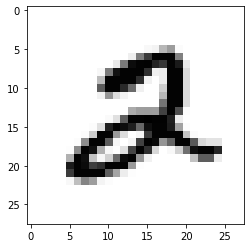

In [81]:
display_image(5)

### 5.2. K-means on images <a class="anchor" id="ch5_2"></a>

In [82]:
kmeans_model = KMeans(n_clusters=10,max_iter=1000).fit(mnist_features)

In [84]:
kmeans_centroids = kmeans_model.cluster_centers_
kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

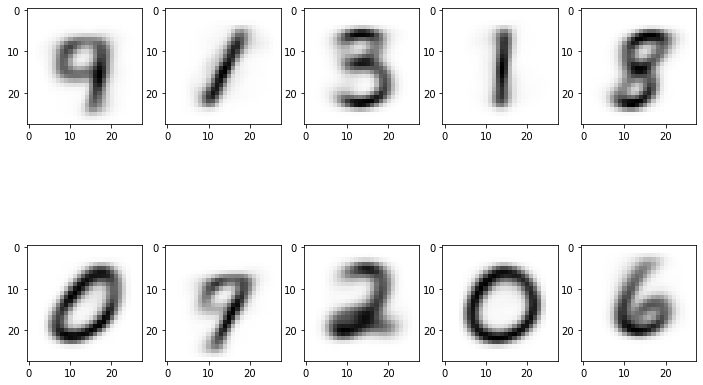

In [86]:
fig,ax = plt.subplots(figsize=(12,8))
for centroid in range(len(kmeans_centroids)):
    plt.subplot(2,5,centroid+1)
    plt.imshow(kmeans_centroids[centroid].reshape(28,28),cmap='Greys')

In [87]:
mnist_test = mnist_data.sample(10, replace=False)
mnist_test_features = mnist_test.drop('label', axis=1)
mnist_test_labels = mnist_test['label']

In [88]:
mnist_test_labels = np.array(mnist_test_labels)

In [91]:
pred_clusters = kmeans_model.predict(mnist_test_features)
pred_results = pd.DataFrame({'acutal_digit': mnist_test_labels,
                           'pred_cluster' : pred_clusters})
pred_results.head(10)

,acutal_digit,pred_cluster
0,4,0
1,9,6
2,7,3
3,0,8
4,1,1
5,7,6
6,6,9
7,2,3
8,1,3
9,7,3


### 5.3. Minibach K-means on images <a class="anchor" id="ch5_3"></a>

In [92]:
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10,max_iter=10000,batch_size=100).fit(mnist_features)

In [94]:
minibatch_centroids = minibatch_kmeans_model.cluster_centers_
minibatch_centroids.shape

(10, 784)

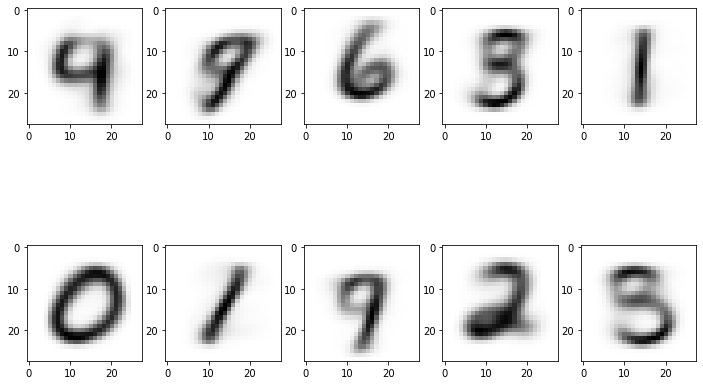

In [95]:
fig,ax = plt.subplots(figsize=(12,8))
for centroid in range(len(minibatch_centroids)):
    plt.subplot(2,5,centroid+1)
    plt.imshow(minibatch_centroids[centroid].reshape(28,28),cmap='Greys')